In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

### Load data (pre-processed in clean.ipynb) and define useful constants

In [2]:
# load data
res = pd.read_csv("results/results_cleaned.csv")

# required fields
ids = ['timestamp','postId','workerId','mode']

# questions
qs = ['timestamp','postId','workerId','mode',
      'question1', 'question2', 'question3', 'question4', 'question5',
      'comments', 'response']

answers=["Strongly Disagree","Disagree","Neutral","Agree","Strongly Agree"]
modes = ["List", "Category", "Pairwise"]
questions = ['question1', 'question2', 'question3', 'question4', 'question5']
titles = ["The final ranking generated by the system reflected my personal preferences about colleges.",
"I would use this system to make decisions about colleges.",
"When I was entering colleges into the build tool, I could easily express my preferences.",
"The dataset contained all the colleges that I wanted to rank.",
"The system displayed all the details about the colleges \nthat I needed to compare them." ]

In [3]:
amts = [13,12,5]

### Plot questions

In [4]:
# compute bootstrapped confidence interval
def bootstrap_mean(data, n_bootstraps):
    bootstraps = []
    for i in range(n_bootstraps):
        # Sample with replacement from data
        bootstraps.append(resample(data).mean())
    return pd.Series(bootstraps)

In [5]:
# should we change the interactions to just be add remove? 
# can tell by url if high low etc

res.replace(to_replace=['ADD', 'HIGH ADD', 'LOW ADD', 'LEFT ADD', 'RIGHT ADD'], value ='ADD', inplace=True)
res.replace(to_replace=['REMOVE', 'HIGH REMOVE', 'LOW REMOVE', 'LEFT REMOVE', 'RIGHT REMOVE'], value ='REMOVE', inplace=True)

In [6]:
def confidence_questions(res, q, title, filename):
    d = res.sort_values("timestamp", ascending=False).dropna(subset=[q])[["mode","workerId",q]].drop_duplicates()
    d.drop_duplicates(subset=["workerId"], keep='first', inplace=True)
    boot = pd.DataFrame()
    for m in modes:
        boot[m]=bootstrap_mean(d[d["mode"] == m][q], 1000)
    
    mean = boot.mean()
    err = []
    err.append((boot.apply(lambda x : np.percentile(x, (5))) - mean).abs())
    err.append(boot.apply(lambda x : np.percentile(x, (95))) - mean)

    plt.errorbar(mean, [0,1,2], xerr=err, fmt='o-',linestyle='none', ecolor=['red','blue','green'], elinewidth=3, markersize=7 )
    plt.yticks([0,1,2], mean.index, size='large')
    plt.title(title, size='x-large')
    plt.xticks([-2.0,-1.0,0.0,1.0,2.0], answers, size='large')
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.gcf().clear()

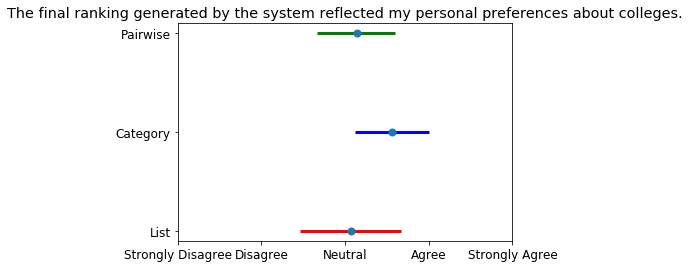

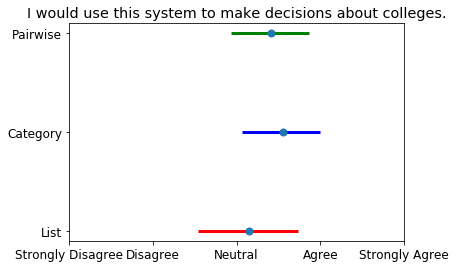

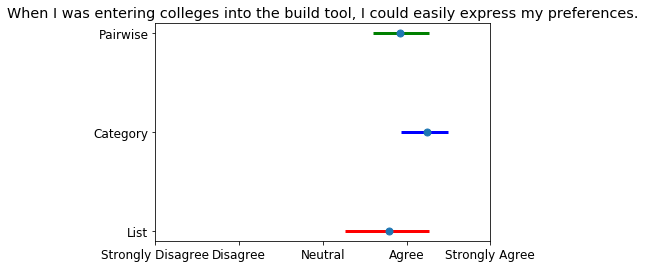

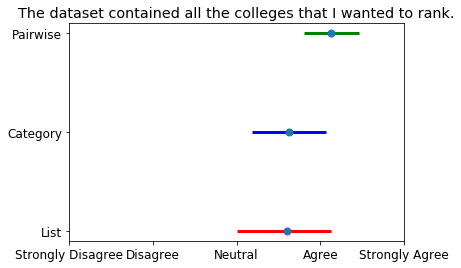

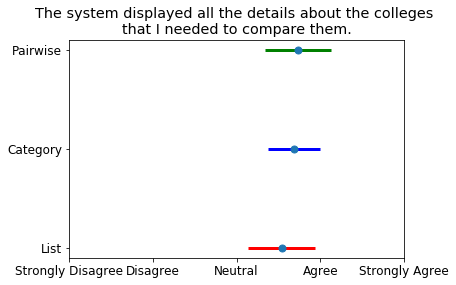

In [7]:
questions = ['question1', 'question2', 'question3', 'question4', 'question5']
for i,q in enumerate(questions):
    confidence_questions(res, q, titles[i], "results/conf_"+q+".png")

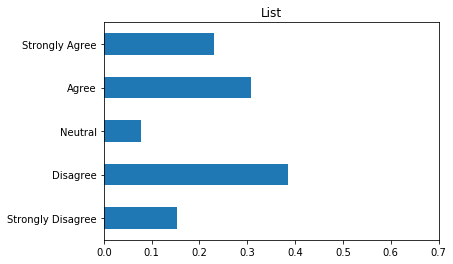

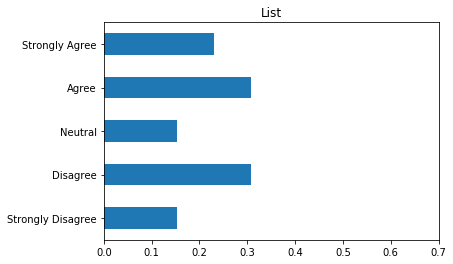

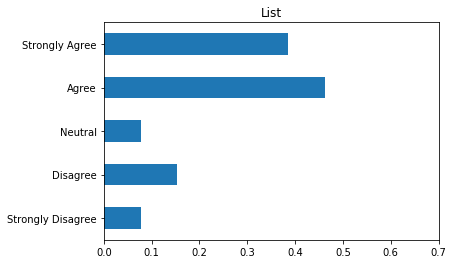

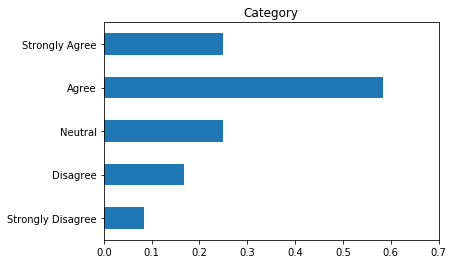

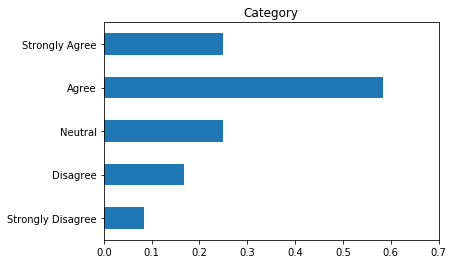

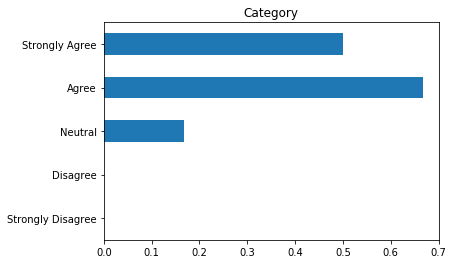

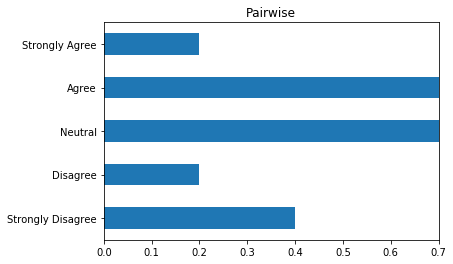

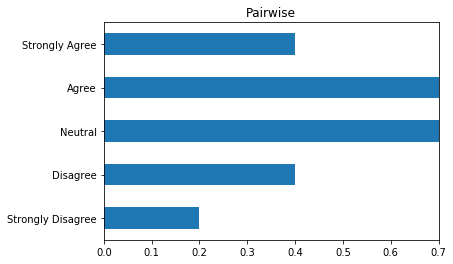

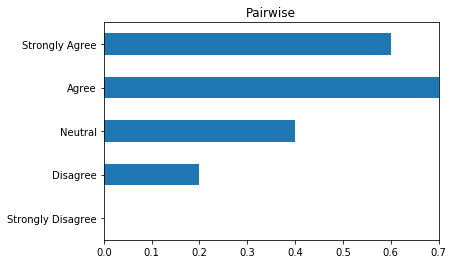

In [8]:
questions = ['question1', 'question2', 'question3']
for j,m in enumerate(modes):
    df = pd.DataFrame(index=[-2.0,-1.0,0.0,1.0,2.0])
    for i,q in enumerate(questions):
        c = res[res['mode']==m].sort_values("timestamp", ascending=False).dropna(
            subset=[q])[["workerId",q]].drop_duplicates()
        c.drop_duplicates(subset=["workerId"], keep='first', inplace=True)
        df[q] = c[q].value_counts()
        df[q] = df[q]/amts[j]
        ax = df[q].plot.barh()
        ax.set_xlim(0,0.7)
        ax.set_title(m)
        ax.set_yticklabels(answers)
        plt.savefig("results/"+m+"_"+q+".png", bbox_inches='tight')
        plt.show()
        plt.gcf().clear()


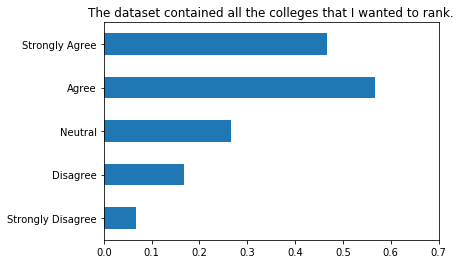

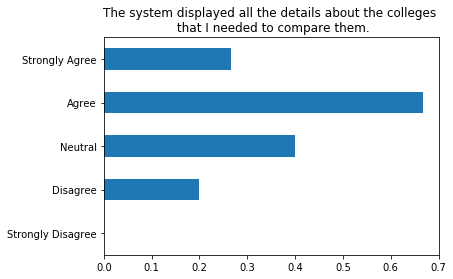

In [9]:
questions = ['question4', 'question5']
titles = ["The dataset contained all the colleges that I wanted to rank.",
"The system displayed all the details about the colleges \n that I needed to compare them." ]
df = pd.DataFrame(index=[-2.0,-1.0,0.0,1.0,2.0])
for i,q in enumerate(questions):
    c = res.sort_values("timestamp", ascending=False).dropna(
            subset=[q])[["workerId",q]].drop_duplicates()
    c.drop_duplicates(subset=["workerId"], keep='first', inplace=True)
    df[q] = c[q].value_counts()
    df[q] = df[q]/30
    ax = df[q].plot.barh()
    ax.set_xlim(0,0.7)
    ax.set_title(titles[i])
    ax.set_yticklabels(answers)
    plt.savefig("results/label_"+q+".png", bbox_inches='tight')
    plt.show()
    plt.gcf().clear()
    